## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Changing epoch time to human readable and fixing the timezone to GMT +2

In [16]:
def time_fixer(df):
    df['time'] = pd.to_datetime(df['time'], unit='ns')
    df['time'] = df['time'] + pd.Timedelta(hours= 2)
    return df

In [2]:
def time_fix(gyro_path, acc_path):

    '''
    This function takes the path of the gyroscope and accelerometer csv files and returns a dataframe with the time column converted from epoch time to human readable time as well as fixing the time zone to GMT +2
    '''

    gyro = pd.read_csv(gyro_path)
    acc = pd.read_csv(acc_path)
    #convert epoch time to human readable time
    gyro['time'] = pd.to_datetime(gyro['time'], unit='ns')
    acc['time'] = pd.to_datetime(acc['time'], unit='ns')
    #fixing the time zone to GMT+2
    gyro['time'] = gyro['time'] + pd.Timedelta(hours=2)
    acc['time'] = acc['time'] + pd.Timedelta(hours=2)

    return gyro, acc

## Plotting the x, y, z axis of the dataframe 

In [3]:
def plotting(gyro, acc, axis, lower_lim = 0, upper_lim =0):

    '''
    Provide the gyro and acc dataframes and the axis you want to plot as well as the lower and upper limits of the plot and this function will plot the data
    The axis parameter must be provided as a string or a list
    The lower and upper limits must be provided as strings and in the following format yyyy-mm-dd hh:mm:ss

    '''

    lower_limit = pd.to_datetime(lower_lim) if lower_lim  else gyro.time.min()
    upper_limit = pd.to_datetime(upper_lim) if upper_lim else gyro.time.max()

    df_gyro = gyro[(gyro.time >= lower_limit) & (gyro.time <= upper_limit)]
    df_acc = acc[(acc.time >= lower_limit) & (acc.time <= upper_limit)]

    plt.figure(figsize=(25,10))

    plt.subplot(2,1,1)
    for i in axis:
        plt.plot(df_gyro.time, df_gyro[i], label=i)
    plt.legend()

    plt.subplot(2,1,2)
    for i in axis:
        plt.plot(df_acc.time, df_acc[i], label=i)
    plt.legend()
    
    plt.show()

## Segmenting the data into N seconds time intervals

In [4]:
def segmentor(df, interval_length, sampling_rate):

    '''
    This function takes a dataframe along with the time interval length that you wish to segment the dataframe into and the sampling rate of the data and returns a dataframe that has the start time and end time of each segment
    as well as the values of the data in each segment represented in a list in addition to the variance, men and standard deviation of each data segment list

    Note: The time interval must be provided in seconds and the sampling rate is provided in Hz
    '''

    segemnted_df = pd.DataFrame(columns=['start_time', 'end_time', 'x', 'y', 'z', 'varx', 'vary', 'varz', 'meanx', 'meany', 'meanz', 'stdx', 'stdy', 'stdz'])
    interval_length = interval_length * sampling_rate

    for i in range(0, len(df) - interval_length, interval_length):
        start_time = df.time[i]
        end_time = df.time[i+interval_length-1]
        x = df.x[i:i+interval_length].tolist()
        y = df.y[i:i+interval_length].tolist()
        z = df.z[i:i+interval_length].tolist()
        varx = np.var(x)
        vary = np.var(y)
        varz = np.var(z)
        meanx = np.mean(x)
        meany = np.mean(y)
        meanz = np.mean(z)
        stdx = np.std(x)
        stdy = np.std(y)
        stdz = np.std(z)
        segemnted_df = segemnted_df.append({'start_time':start_time, 'end_time':end_time, 'x':x, 'y':y, 'z':z, 'varx': varx, 'vary': vary, 'varz': varz, 'meanx': meanx, 'meany': meany, 
                        'meanz': meanz, 'stdx': stdx, 'stdy': stdy, 'stdz': stdz}, ignore_index=True)
    return segemnted_df

In [5]:
df_gyro, df_acc = time_fix('./datasets/collected_data/2022-11-27_10-14-06/Gyroscope.csv', './datasets/collected_data/2022-11-27_10-14-06/Accelerometer.csv')

In [6]:
df_gyro.head()

,time,seconds_elapsed,z,y,x
0,2022-11-27 12:14:06.051818500,0.037819,0.008669,-0.002617,0.271008
1,2022-11-27 12:14:06.061897200,0.047897,0.015066,0.039398,0.251205
2,2022-11-27 12:14:06.071976400,0.057977,0.020479,0.009895,0.159585
3,2022-11-27 12:14:06.082055400,0.068055,0.010680,-0.094034,0.049572
4,2022-11-27 12:14:06.092134100,0.078134,0.009496,0.050858,-0.021566


In [7]:
df_acc.head()

,time,seconds_elapsed,z,y,x
0,2022-11-27 12:14:06.051818500,0.037819,0.293490,-0.084207,0.465776
1,2022-11-27 12:14:06.061897200,0.047897,1.411263,0.215102,-0.767911
2,2022-11-27 12:14:06.071976400,0.057977,-0.164906,-0.144899,1.177879
3,2022-11-27 12:14:06.082055400,0.068055,0.631591,0.241940,0.352033
4,2022-11-27 12:14:06.092134100,0.078134,1.481419,-0.175413,-0.496216


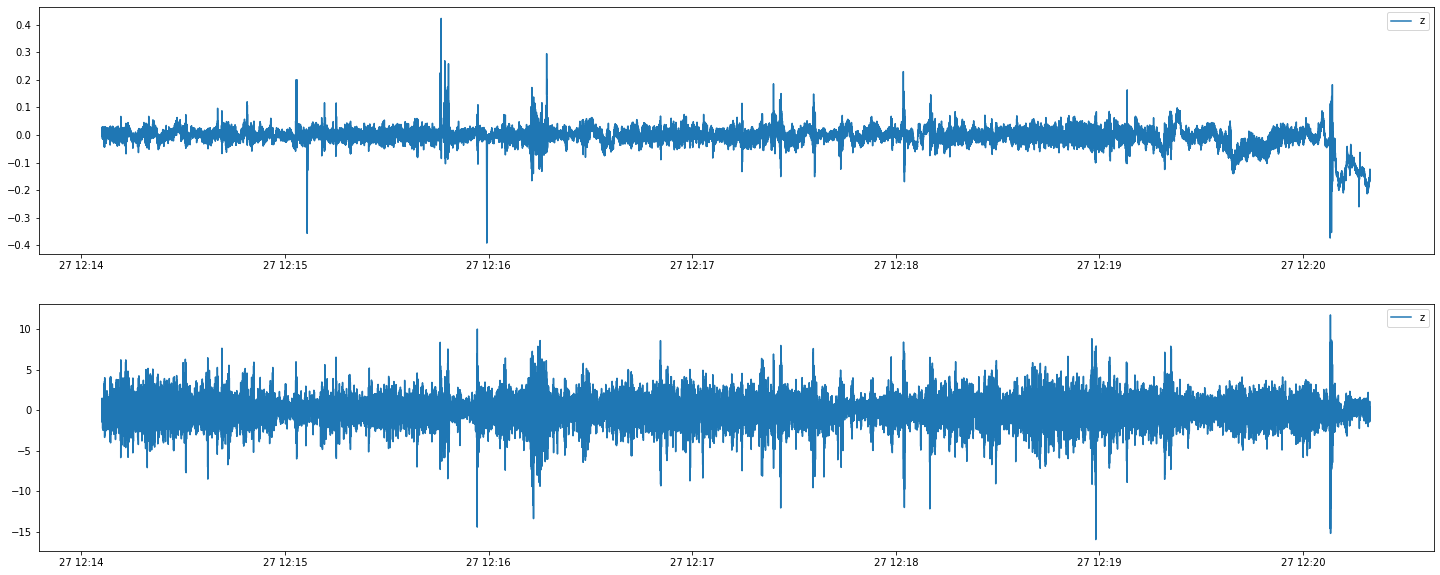

In [8]:
plotting(df_gyro, df_acc, 'z')

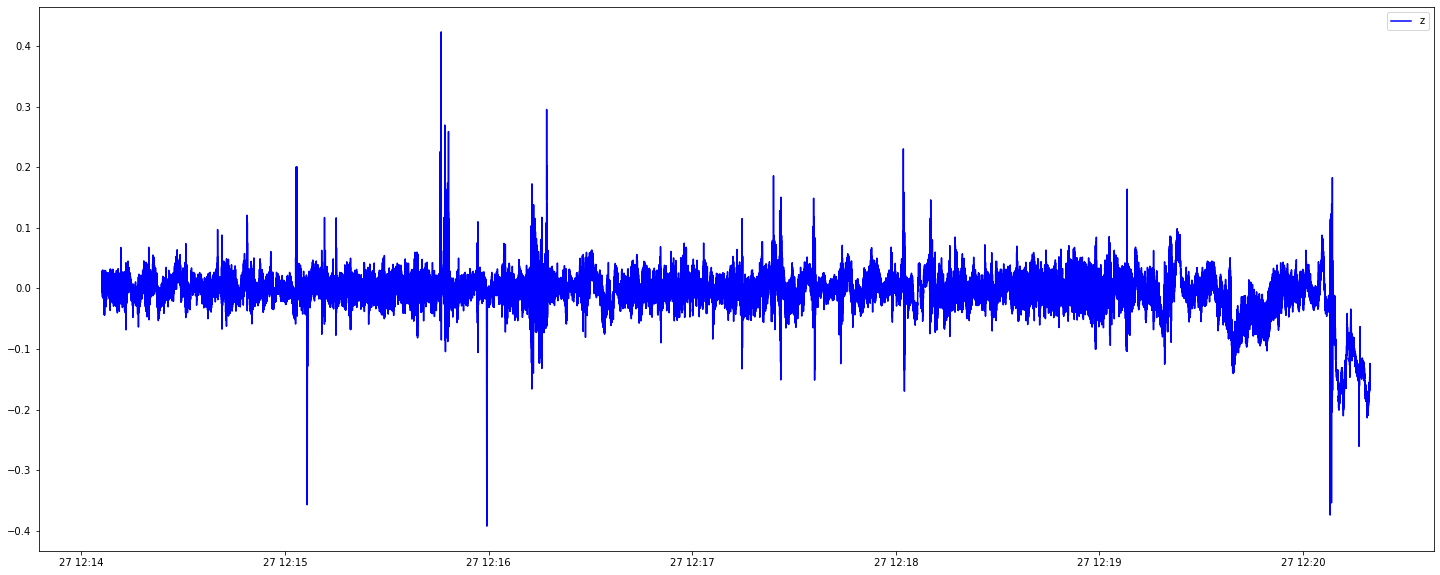

In [9]:
plt.figure(figsize=(25,10))
plt.plot(df_gyro.time, df_gyro.z, label='z', color='blue')
plt.legend()

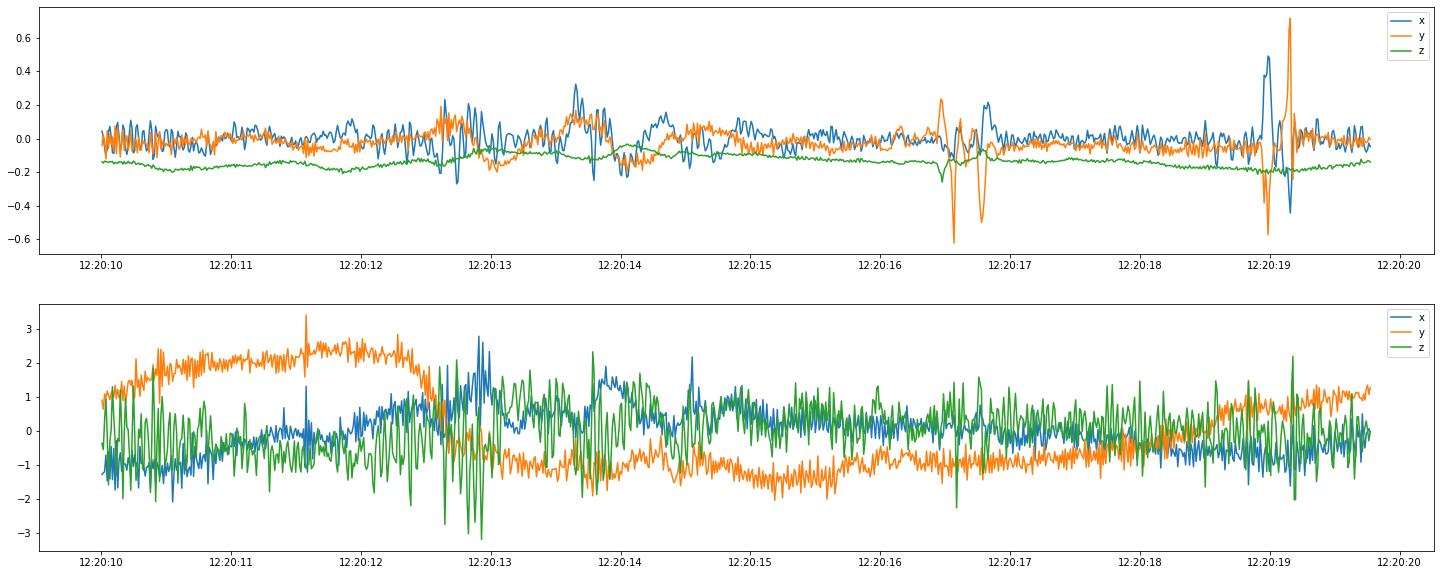

In [10]:
plotting(df_gyro, df_acc, 'xyz', '2022-11-27 12:20:10.000000000', '2022-11-27 12:20:20.000000000')

In [11]:
df_gyro_10, df_acc_10 = time_fix('./datasets/collected_data/2022-11-30_10-38-45/Gyroscope.csv', './datasets/collected_data/2022-11-30_10-38-45/Accelerometer.csv')
df_gyro_10.head()

,time,seconds_elapsed,z,y,x
0,2022-11-30 12:38:45.140398600,0.138399,-0.007369,-0.093977,-0.104091
1,2022-11-30 12:38:45.241190400,0.239190,0.056040,-0.041364,-0.020088
2,2022-11-30 12:38:45.341982500,0.339982,-0.000903,0.091354,0.150575
3,2022-11-30 12:38:45.442774500,0.440774,-0.012849,0.011803,0.057137
4,2022-11-30 12:38:45.543566600,0.541567,-0.016204,0.153853,0.037589


In [12]:
df_acc_10.head()

,time,seconds_elapsed,z,y,x
0,2022-11-30 12:38:45.140398600,0.138399,0.905890,0.835826,1.363880
1,2022-11-30 12:38:45.241190400,0.239190,1.475896,0.674901,0.224197
2,2022-11-30 12:38:45.341982500,0.339982,-0.276091,-0.160981,-0.896177
3,2022-11-30 12:38:45.442774500,0.440774,-0.580108,-0.327499,-0.201646
4,2022-11-30 12:38:45.543566600,0.541567,-0.149272,-0.147304,-0.071250


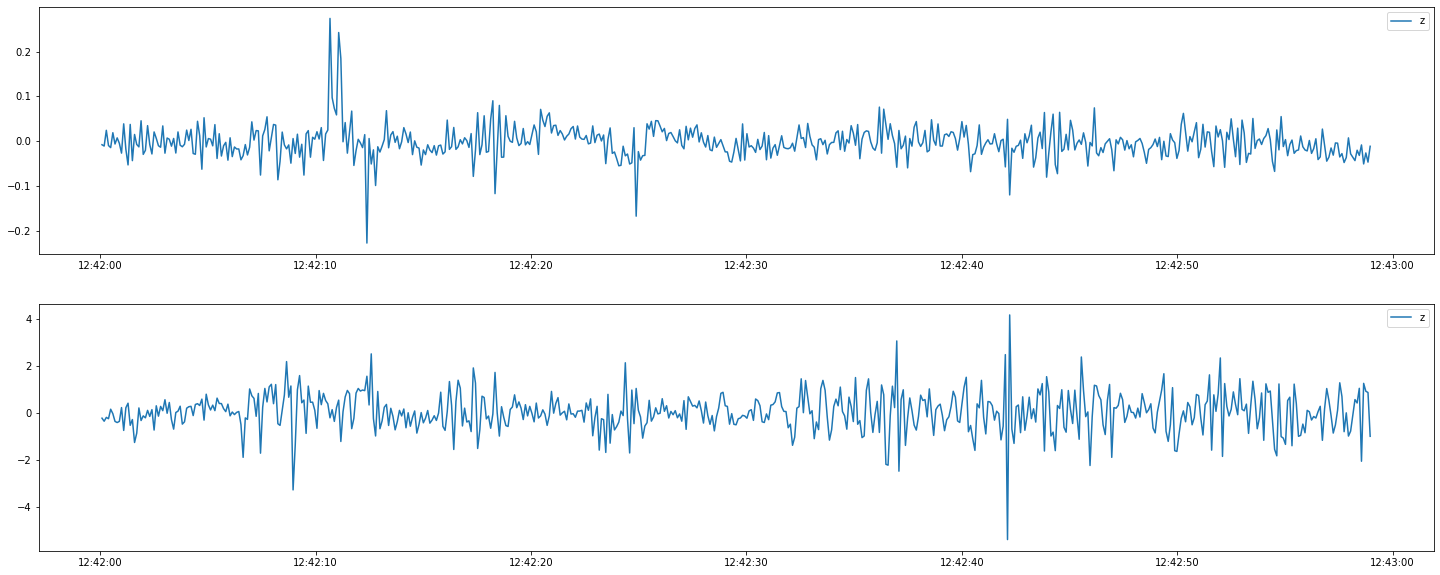

In [13]:
plotting(df_gyro_10, df_acc_10, 'z', '2022-11-30 12:42:00.000000000', '2022-11-30 12:42:59.000000000')

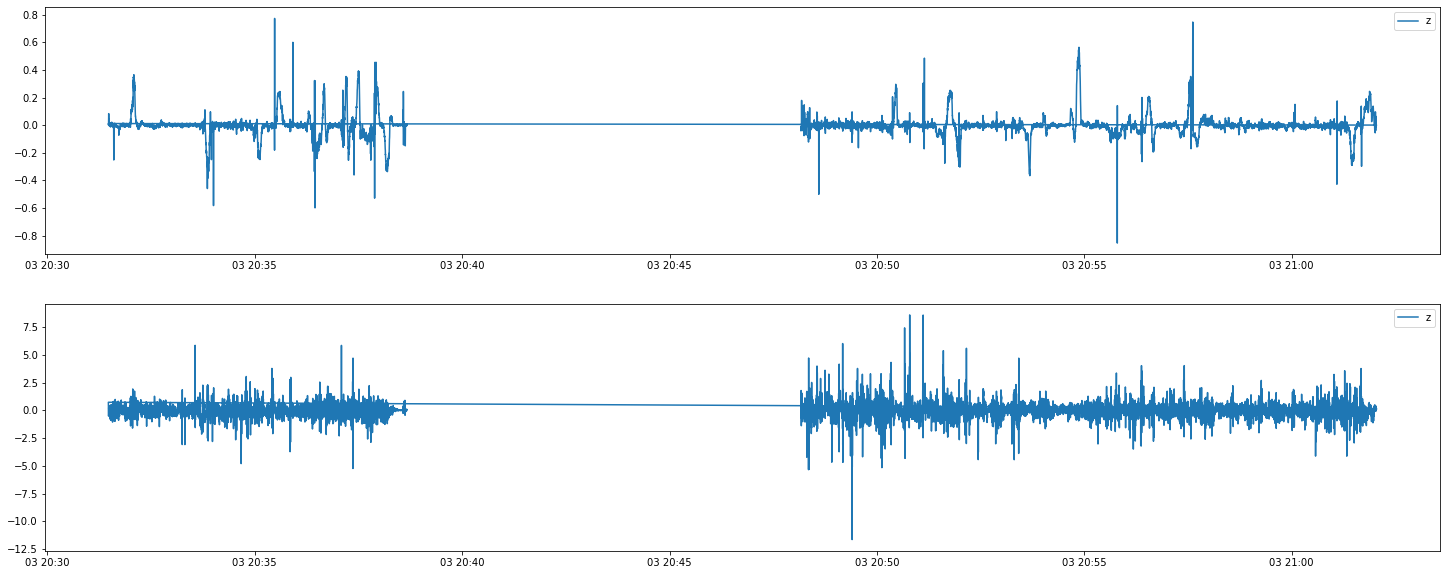

In [14]:
gyro_10 = './datasets/collected_data/2022-12-03_18-48-09/Gyroscope.csv'
acc_10 = './datasets/collected_data/2022-12-03_18-48-09/Accelerometer.csv'
gyro_10_2 = './datasets/collected_data/2022-12-03_18-31-28/Gyroscope.csv'
acc_10_2 = './datasets/collected_data/2022-12-03_18-31-28/Accelerometer.csv'

gyro_10, acc_10 = time_fix(gyro_10, acc_10)
gyro_10_2, acc_10_2 = time_fix(gyro_10_2, acc_10_2)

# stitching the two dataframes together
gyro_10 = pd.concat([gyro_10, gyro_10_2], ignore_index=True)
acc_10 = pd.concat([acc_10, acc_10_2], ignore_index=True)

plotting(gyro_10, acc_10, 'z')



## Exploring Roll, Pitch and Yaw


In [19]:
orientation_df = pd.read_csv('./datasets/collected_data/2022-12-03_18-48-09/Orientation.csv')

orientation_df.shape

(8262, 9)

In [17]:
orientation_df = time_fixer(orientation_df)
orientation_df.head()

,time,seconds_elapsed,yaw,qx,qz,roll,qw,qy,pitch
0,2022-12-03 20:48:09.920268500,0.044269,-0.573962,-0.207254,0.277429,-0.011149,-0.935741,0.066839,0.438916
1,2022-12-03 20:48:10.021059600,0.145060,-0.577460,-0.217991,0.277980,-0.007075,-0.933026,0.068343,0.460926
2,2022-12-03 20:48:10.121850600,0.245851,-0.580634,-0.220211,0.279091,-0.004958,-0.932175,0.068307,0.465285
3,2022-12-03 20:48:10.222641700,0.346642,-0.583085,-0.217486,0.280530,-0.006133,-0.932377,0.068384,0.459975
4,2022-12-03 20:48:10.323433700,0.447434,-0.585051,-0.211205,0.282181,-0.009470,-0.933319,0.068429,0.447665


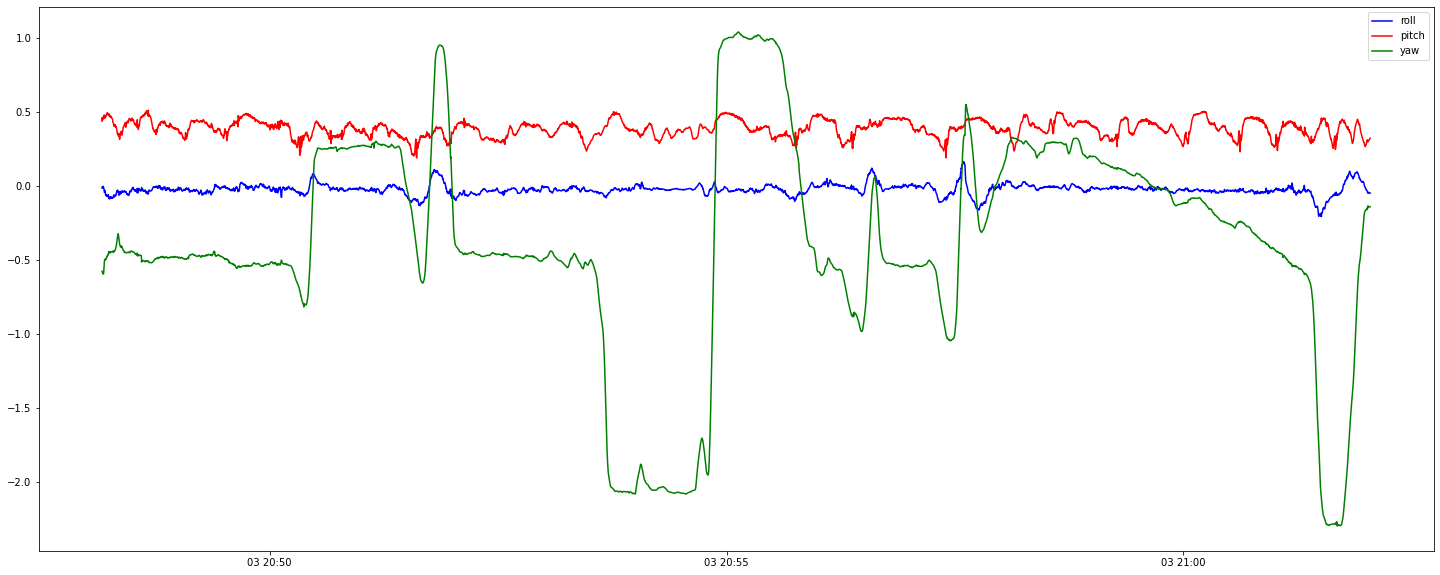

In [18]:
plt.figure(figsize=(25,10))
plt.plot(orientation_df.time, orientation_df.roll, label='roll', color='blue')
plt.plot(orientation_df.time, orientation_df.pitch, label='pitch', color='red')
plt.plot(orientation_df.time, orientation_df.yaw, label='yaw', color='green')
plt.legend()
